Simulation of 10000 ms of 400 independent descending commands following a gamma distribution with mean of 142 ms and order 10 

In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import scipy.stats

from Configuration import Configuration
from NeuralTract import NeuralTract

In [2]:
conf = Configuration('confNeuralTractSpikes.rmto')

In [3]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [4]:
pools = dict()
pools[0] = NeuralTract(conf, 'CMExt')

tic = time.clock()
for i in xrange(0,len(t)-1):
    pools[0].atualizePool(t[i])
toc = time.clock()
print str(toc - tic) + ' seconds'

Descending Command CMExt built
84.213931 seconds


In [6]:
pools[0].listSpikes()

The spike times of all descending commands along the 10000 ms of simulation is shown in Fig. \ref{fig:spikesDesc}.

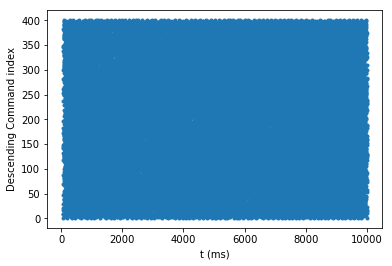

In [7]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
         pools[0].poolTerminalSpikes[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Descending Command index')

The spike times of all descending commands during the last 1000 ms of the simulation is shown in Fig. \ref{fig:spikesDescLast}.


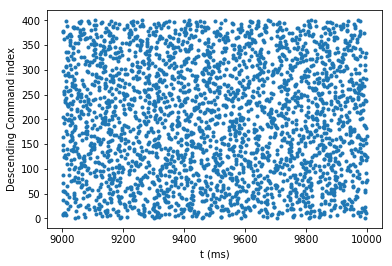

In [8]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[pools[0].poolTerminalSpikes[:, 0]>9000, 0],
         pools[0].poolTerminalSpikes[pools[0].poolTerminalSpikes[:, 0]>9000, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Descending Command index')

The histogram of the interspike intevals of all the descending commands is shown in Fig. \ref{fig:hist}. Note that the peak is in the specified ISI at the beginning of the simulation.

In [9]:
ISI = np.array([])
for i in xrange(0,len(pools[0].unit)):
    ISI = np.append(ISI, np.diff(np.reshape(np.array(pools[0].unit[i].terminalSpikeTrain), (-1,2))[:,0]))
    

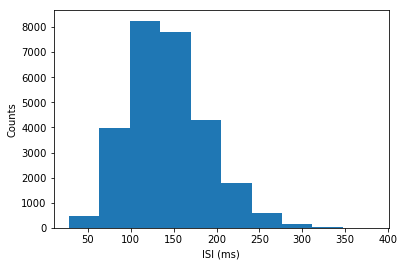

In [10]:
plt.figure()
plt.hist(ISI)
plt.xlabel('ISI (ms)')
plt.ylabel('Counts')

Below different statistics of the interspike intervals and firing rate are obtained.

In [11]:
SD = np.std(ISI)
M = np.mean(ISI)
SK = scipy.stats.skew(ISI)
CV = SD / M

print 'ISI Mean = ' + str(M) + ' ms'
print 'ISI Standard deviation = ' + str(SD) + ' ms'
print 'ISI CV = ' + str(CV)

ISI Mean = 142.90928031 ms
ISI Standard deviation = 45.3428947209 ms
ISI CV = 0.317284466219


In [12]:
M_FR = 1000.0 / M
SD_FR = np.sqrt((SD**2) * 1000 / (M**3) + 1/6.0 + (SD**4) / (2*M**4) - SK/(3*M**3))


print 'Firing rate mean = ' + str(M_FR) + ' Hz'
print 'Firing rate standard deviation = ' + str(SD_FR) + ' Hz'

Firing rate mean = 6.99744619685 Hz
Firing rate standard deviation = 0.936035629246 Hz


In [13]:
CV_FR = SD_FR / M_FR
print 'CV of Firing rate = ' + str(CV_FR)

CV of Firing rate = 0.13376817812
